<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [1]:
%matplotlib inline
import chronos as cr

#to list available cluster catalogs
cr.cluster.CATALOG_LIST

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


['Hao2022',
 'Hao2021',
 'He2022b',
 'He2022a',
 'CastroGinard2022',
 'CastroGinard2020',
 'CantatGaudin2020',
 'CastroGinard2019',
 'CantatGaudin2018',
 'Babusiaux2018',
 'Bouma2019',
 'Nataf2019',
 'Gagne2018a',
 'Gagne2018b',
 'Bossini2019',
 'Carrera2019',
 'Zuckerman2019',
 'Murphy2013',
 'Bell2015',
 'Gagne2018c',
 'Olivares2019',
 'Ujjwal2020',
 'Shkolnik2009',
 'Shkolnik2012',
 'RamirezPreciado2018',
 'Zerjal2017',
 'Binks2020',
 'Bowler2019',
 'Rodriguez2013',
 'Portegies2010',
 'Sampedro2017',
 'Randich2018',
 'Karchenko2013',
 'Dias2016',
 'Curtis2019',
 'Lodieu2019',
 'Schneider2019',
 'Grandjean2020',
 'Berger2020',
 'Berger2018',
 'Kounkel2019',
 'Bianchi2017_GALEX',
 'Chiu2021',
 'Lu2021']

## Loading a cluster catalog

In [2]:
#initialize; CantatGaudin2020 is used as default
cc = cr.ClusterCatalog()
cc

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/633/A99


ClusterCatalog(catalog_name=CantatGaudin2020)

In [3]:
# cluster summary
df = cc.query_catalog(return_members=False)
df.shape

Using CantatGaudin2020 catalog.


(1481, 17)

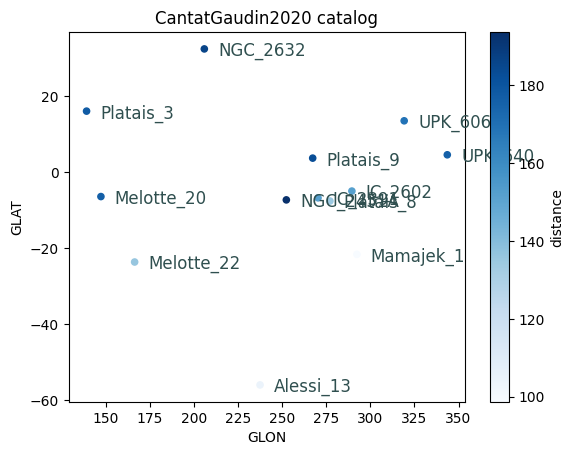

In [4]:
#plot clusters in catalog 
cc.all_clusters = cc.all_clusters[cc.all_clusters['distance']<200]
fig = cc.plot_all_clusters(x='GLON', y='GLAT', c='distance');
# fig.axes.set_xscale('log')
# fig.axes.set_yscale('log')

In [5]:
df_mem = cc.query_catalog(return_members=True)
df_mem.shape

Using CantatGaudin2020 catalog.


(435833, 14)

## search cluster members and properties

In [ ]:
#compare IC_2602 members from two different catalogs

cluster_name = 'IC_2602'

c1 = cr.Cluster(catalog_name='CantatGaudin2020', 
             cluster_name=cluster_name, 
             verbose=False)

c2 = cr.Cluster(catalog_name='Bouma2019', 
             cluster_name=cluster_name, 
             verbose=False)

In [ ]:
df1 = c1.query_cluster_members()
df2 = c2.query_cluster_members()

df1.shape, df2.shape

In [ ]:
import matplotlib.pyplot as pl

df1['parallax'].plot(kind='hist', bins=30, label=c1.catalog_name)
df2['parallax'].plot(kind='hist', bins=30, label=c2.catalog_name)
pl.title(cluster_name)
pl.xlabel('Parallax [mas]')
pl.legend()

In [ ]:
fig, ax = pl.subplots(2,1, figsize=(10,8), sharex=True, constrained_layout=True)

df1['parallax'].plot(ax=ax[0], kind='hist', color='C1', bins=30)
df2['parallax'].plot(ax=ax[1], kind='hist', color='C2', bins=30)
ax[1].set_xlabel('Parallax [mas]')
fig.suptitle(cluster_name)
ax[0].legend([c1.catalog_name])
ax[1].legend([c2.catalog_name])

Bouma+2019 has more (mis-labeled) members mainly but CantatGaudin+2020 has more reliable members due to strict kinematics constraints.

## membership

In [ ]:
import chronos as cr

t = cr.Target(toiid=837)

In [2]:
cluster = t.get_cluster_membership()

Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 30.00 arcsec.
There are 29 gaia sources within 30.0 arcsec.
High proper-motion star:
(pmra,pmdec)=(-18.02,11.31) mas/yr
Found 1 references in Vizier with `ruwe`.
TOI 837 is in IC_2602!
Found 0 references in Vizier with `Assoc`.
ra: 11 matched.
dec: 20 matched.
parallax: 6 matched.
pmra: 6 matched.
pmdec: 8 matched.
rv: 343 matched.
matched 5 params in IC_2602:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']


In [3]:
cluster = t.get_cluster_membership(catalog_name="CastroGirard2020")

TOI 837 is in IC_2602!
Found 0 references in Vizier with `Assoc`.
ra: 11 matched.
dec: 20 matched.
parallax: 6 matched.
pmra: 6 matched.
pmdec: 8 matched.
rv: 343 matched.
matched 5 params in IC_2602:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']


## find nearest cluster to target

In [4]:
import chronos as cr

t = cr.Target(toiid=837)
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Target: TOI 837
Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 30.00 arcsec.
There are 29 gaia sources within 30.0 arcsec.
High proper-motion star:
(pmra,pmdec)=(-18.02,11.31) mas/yr
Found 1 references in Vizier with `ruwe`.


In [15]:
import chronos as cr

t = cr.Target(toiid=837)
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Target: TOI 837
Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 30.00 arcsec.
There are 29 gaia sources within 30.0 arcsec.
High proper-motion star:
(pmra,pmdec)=(-18.02,11.31) mas/yr
Found 1 references in Vizier with `ruwe`.


In [18]:
#3d coordinates
t.target_coord

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (157.03729167, -64.50521111, 143.07643772)>

In [19]:
nearest_cluster_member = t.get_nearest_cluster_member(catalog_name="CantatGaudin2020", match_id=True)

Using CantatGaudin2020 catalog.
Target is in IC_2602 (CantatGaudin2020)!


In [20]:
#nearest star in a cluster
t.nearest_cluster_member

raJ2015                        157.037
decJ2015                      -64.5052
source_id          5251470948229949568
parallax                        6.9893
pmra                           -18.017
pmdec                           11.307
rv                             17.4453
phot_g_mean_mag                 10.356
bp_rp                           0.8076
Proba                              0.9
Cluster                        IC_2602
ra                             157.037
dec                           -64.5053
Name: 143290, dtype: object

In [21]:
t.nearest_cluster_name

'IC_2602'

In [22]:
#nearest cluster
t.nearest_cluster_members.tail()

,raJ2015,decJ2015,source_id,parallax,pmra,pmdec,rv,phot_g_mean_mag,bp_rp,Proba,Cluster,ra,dec
143287,161.191413,-65.907201,5239088316996695808,6.9113,-18.749,11.906,NaN,14.9004,2.6350,0.9,IC_2602,161.191611,-65.907252
143288,156.286836,-63.344328,5252147938168573312,6.9476,-17.918,12.433,NaN,16.4751,3.0686,0.9,IC_2602,156.287008,-63.344382
143289,160.350751,-63.897952,5239911129666148096,6.9537,-18.889,10.666,NaN,17.4597,3.4301,0.9,IC_2602,160.350936,-63.897998
143290,157.037281,-64.505211,5251470948229949568,6.9893,-18.017,11.307,17.445309,10.3560,0.8076,0.9,IC_2602,157.037461,-64.505259
143291,155.104552,-64.123991,5251706312442767872,7.0148,-19.314,9.862,NaN,16.7023,2.5877,0.9,IC_2602,155.104742,-64.124033


## plotting

In [1]:
import matplotlib.pyplot as pl
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


Most catalogs do not have radial_velocity in their members list so we need to query gaia catalog for each members.

In [2]:
t = cr.Target(toiid=837, verbose=False)
gaia_params = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

There are 29 gaia sources within 30.0 arcsec.
High proper-motion star:
(pmra,pmdec)=(-18.02,11.31) mas/yr


In [3]:
t.get_nearest_cluster_member()

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/633/A99
Using CantatGaudin2020 catalog.


raJ2015                        157.037
decJ2015                      -64.5052
source_id          5251470948229949568
parallax                        6.9893
pmra                           -18.017
pmdec                           11.307
radial_velocity                17.4453
phot_g_mean_mag                 10.356
bp_rp                           0.8076
Proba                              0.9
Cluster                        IC_2602
ra                             157.037
dec                           -64.5053
distance                       143.076
Name: 143290, dtype: object

In [4]:
cluster_name = t.nearest_cluster_name
cluster_name

'IC_2602'

In [5]:
c = cr.Cluster(cluster_name=cluster_name)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/633/A99
Using CantatGaudin2020 catalog.


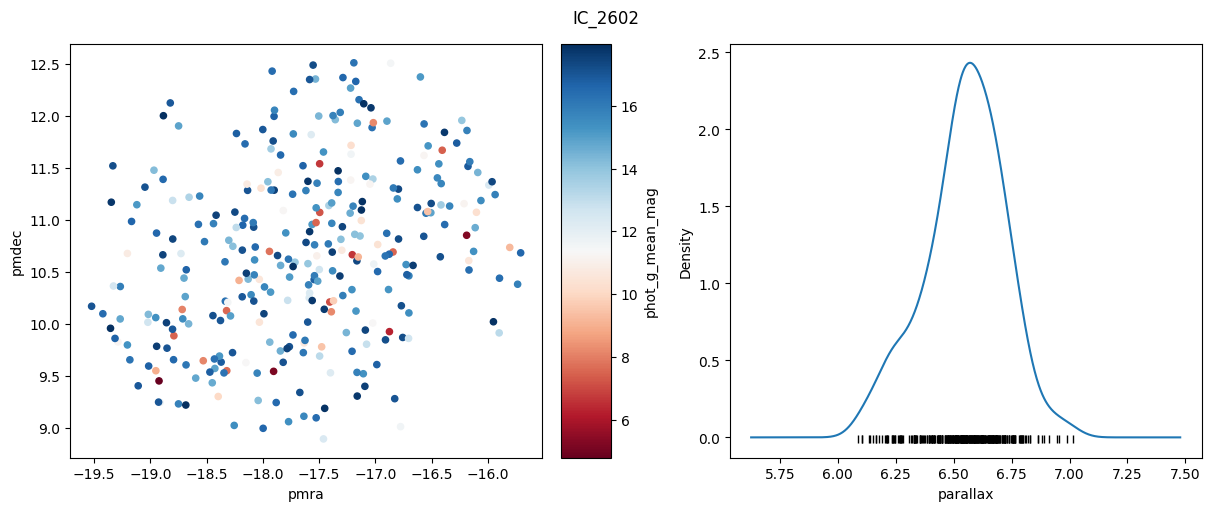

In [6]:
#plot cluster members 
fig = c.plot_cluster_members(x='pmra', y='pmdec', c='phot_g_mean_mag', 
                             z='parallax', #right panel
                             cmap='RdBu'
                            );                            

### CMD

Loaded: /home/jp/github/research/project/chronos/chronos/data/IC_2602_members.hdf5


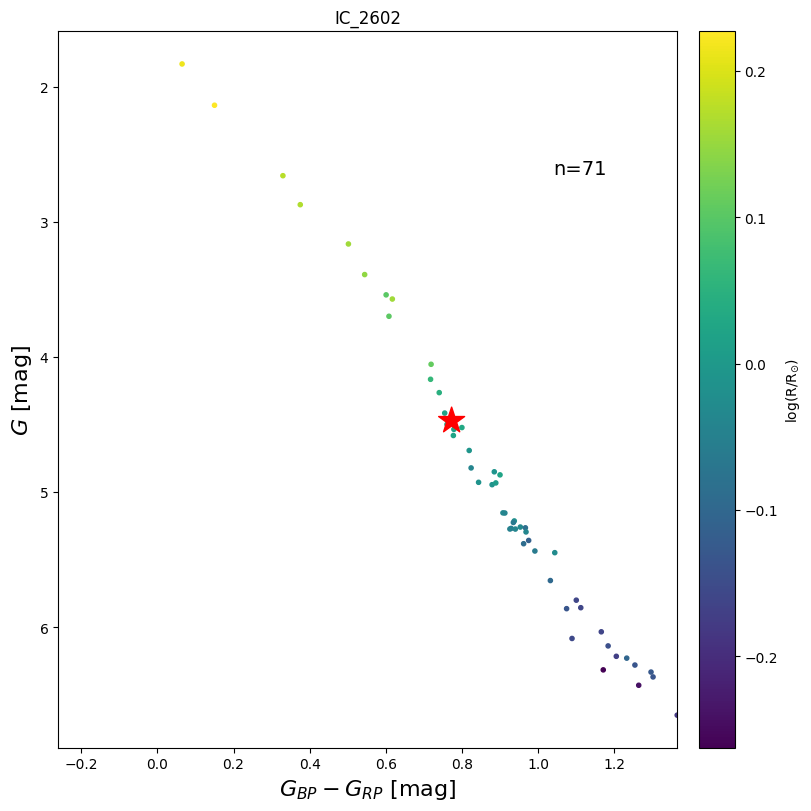

In [29]:
ax = c.plot_cmd(target_gaiaid=t.gaiaid)

### CMD with isochrones

In [ ]:
ax = c.plot_cmd(target_gaiaid=t.gaiaid, log_age=7.75, feh=0.2, eep_limits=(180, 300))

Extinctions are taken into account to compute intrinsic colors and absolute magnitudes .

### HRD

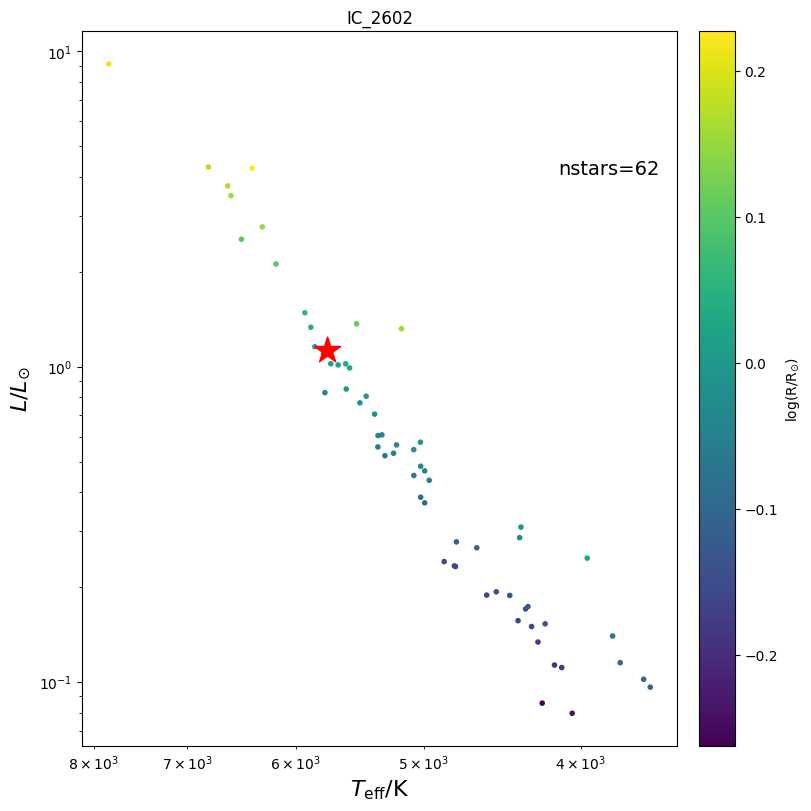

In [32]:
ax = c.plot_hrd(target_gaiaid=t.gaiaid)

### with isochrones

In [ ]:
#overlay isochrones given age~50 Myr
ax = c.plot_hrd(target_gaiaid=t.gaiaid, log_age=7.75, feh=0.2, eep_limits=(180, 280))

## kinematics

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
There are 29 gaia sources within 30.0 arcsec.
High proper-motion star:
(pmra,pmdec)=(-18.02,11.31) mas/yr
Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/633/A99
Using CantatGaudin2020 catalog.
Loaded: /home/jp/github/research/project/chronos/chronos/data/IC_2602_members.hdf5


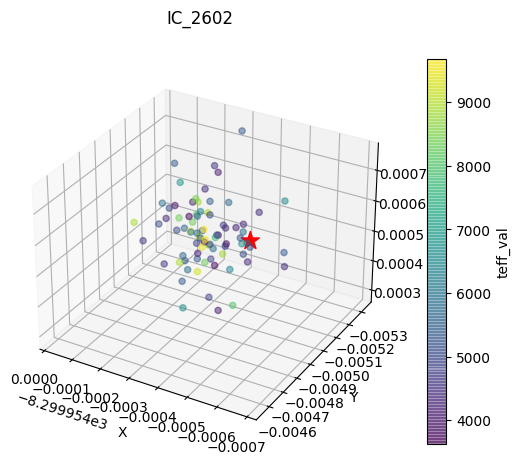

In [1]:
import chronos as cr

t = cr.Target(toiid=837, verbose=False)
gaia_params = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
c = cr.Cluster(cluster_name="IC_2602")

fig = c.plot_xyz_3d(target_gaiaid=t.gaiaid, zlim=(0,100));

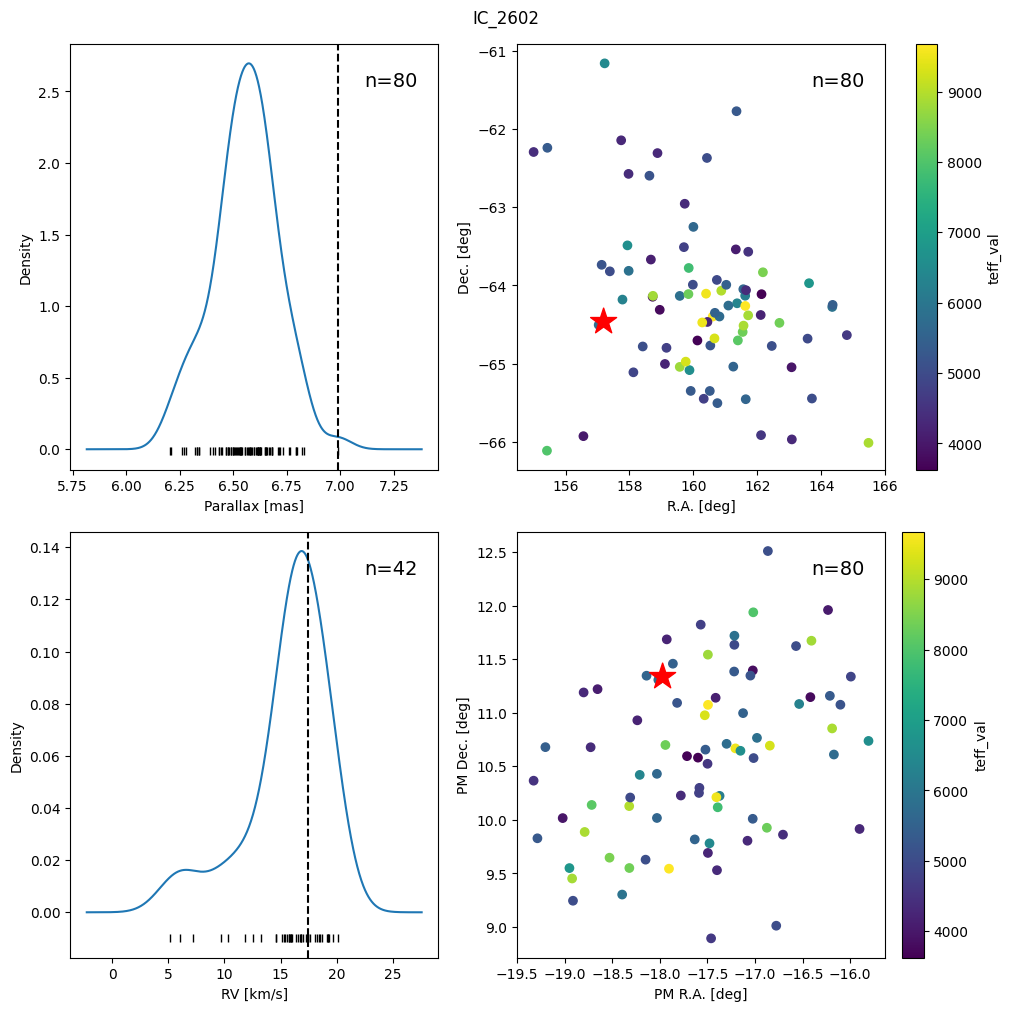

In [2]:
fig = c.plot_rdp_pmrv(target_gaiaid=t.gaiaid);

## kinematics (galactocentric frame)

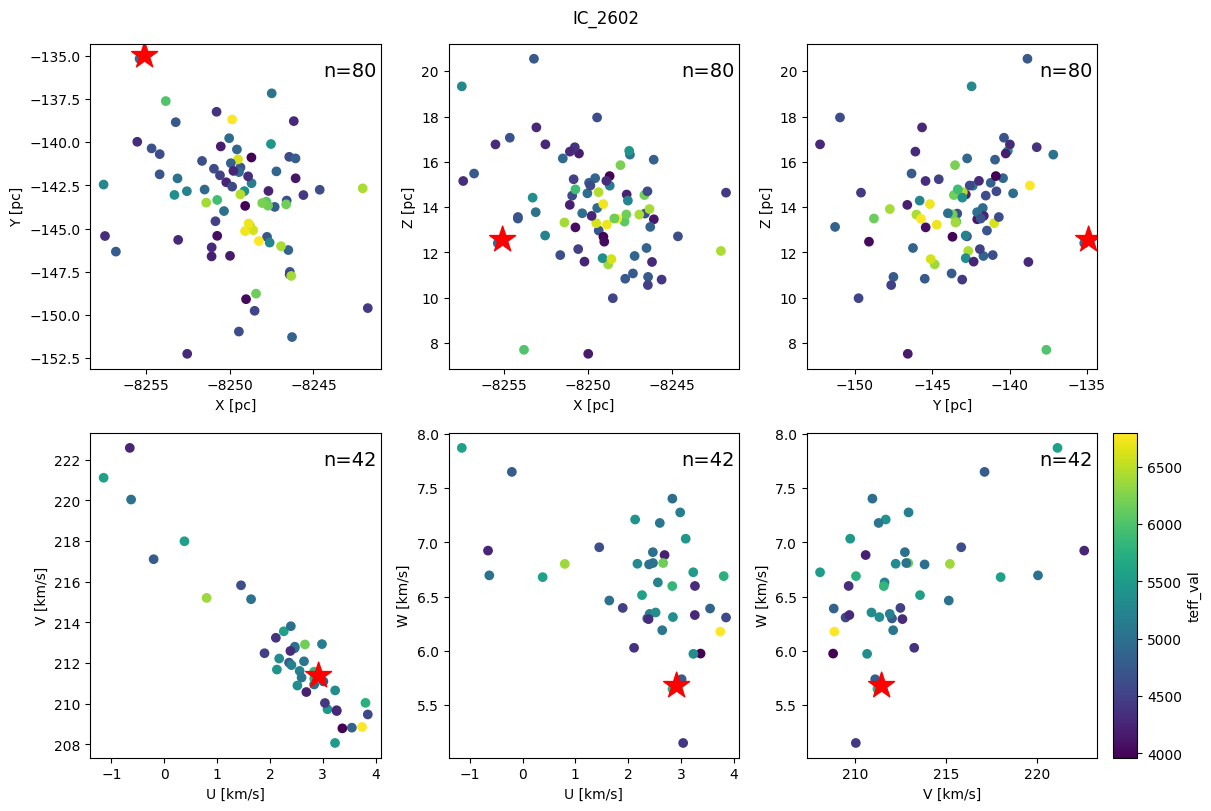

In [3]:
fig = c.plot_xyz_uvw(target_gaiaid=t.gaiaid);

## metallicity distribution

In [4]:
d = c.query_members_in_TGv8_catalog()
d.head()

,Gaia_source_id,Gaia_RA,Gaia_Dec,Gaia_parallax,Gaia_e_parallax,Gaia_pmra,Gaia_e_pmra,Gaia_pmdec,Gaia_e_pmdec,Gaia_vrad,...,RAVE_alpha,LAMOST_Fe_H,LAMOST_Teff,LAMOST_logg,LAMOST_alpha,Casagrande_Fe_H,Casagrande_Teff,Deacon_Fe_H,Deacon_Teff,Deacon_logg
1514656,5239304542829302400,159.916272,-65.348913,6.435295,0.029528,-17.219540,0.047959,11.384576,0.042460,15.787690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514710,5239401432972879872,162.115923,-65.913896,6.498125,0.022884,-17.499332,0.037930,10.523775,0.037487,18.701762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514716,5239414803234249216,163.079514,-65.968518,6.682956,0.024929,-18.801859,0.044645,11.189444,0.042678,18.207687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514748,5239498744077038976,161.637390,-65.455039,6.581388,0.024561,-18.140632,0.044940,11.345592,0.042837,6.064935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514759,5239525196750143616,163.708039,-65.446016,6.503432,0.024886,-18.913824,0.044125,9.245696,0.035556,7.157554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fig = c.plot_Toomre_diagrams(color="Fe_H")

## get gaia params for each TOI

## get nearest cluster for each TOI

See scripts and also known_cluster_host_stars.ipynb.

## cluster analysis
* https://link.springer.com/chapter/10.1007/978-3-662-56707-4_9

In [ ]:
import chronos as cr
import pandas as pd

from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.preprocessing import scale
from sklearn import metrics

In [ ]:
cc=cr.ClusterCatalog()
df=cc.query_catalog(return_members=True)
mem=df.dropna()

In [ ]:
t=cr.Target(toiid=837)
d=t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

In [ ]:
cols2=['ra','dec','parallax','pmra','pmdec','radial_velocity','phot_g_mean_mag','bp_rp','phot_g_mean_mag']
d[cols2].values[:,None].T

In [ ]:
nclusters = len(mem.Cluster.unique())

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"
        ]

classifiers = [
    KNeighborsClassifier(nclusters),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=nclusters),
    RandomForestClassifier(n_estimators=nclusters),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [ ]:
cols1=['ra','dec','parallax','pmra','pmdec','RV','phot_g_mean_mag','bp_rp','phot_g_mean_mag']
X = mem[cols1]
y = mem['Cluster']

In [ ]:
rescale=False

clfs = []
for i,(name, clf) in enumerate(zip(names, classifiers)):
    if rescale:
        X = scale(mem[cols1])
    if clfs is not None:
        clf = clfs[i]
    else:
        clf.fit(X, y)
        clfs.append(clf)
    score = clf.score(X, y)
    
    pred=clf.predict(d[cols2].values[:,None].T)
    print(f"{name}: {score:.2f}\n{pred}")

In [ ]:
clf1 = SVC(kernel='linear')
rescale=False

if rescale:
    X = scale(mem[cols1])
clf1.fit(X, y)

In [ ]:
clf2 = SVC(kernel='rbf')
rescale=False

if rescale:
    X = scale(mem[cols1])
clf2.fit(X, y)

In [ ]:
clf1.predict(d[cols2].values[:,None].T)

In [ ]:
clf2.predict(d[cols2].values[:,None].T)

In [ ]:
#actual
mem.loc[mem.Cluster=='IC_2602',cols1].describe().loc['mean']

In [ ]:
#predict
mem.loc[mem.Cluster=='UPK_612',cols1].describe().loc['mean']

In [ ]:
#predict
mem.loc[mem.Cluster=='NGC_7789',cols1].describe().loc['mean']

In [ ]:
nclusters = len(mem.Cluster.unique())

kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(X)

In [ ]:
kmeans.labels_

In [ ]:
print('inertia\thomo\tcompl\tv-meas\tARI\tAMI')
print('{:.1f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}'.format(
        kmeans.inertia_,
        metrics.homogeneity_score(y, kmeans.labels_),
        metrics.completeness_score(y, kmeans.labels_),
        metrics.v_measure_score(y, kmeans.labels_),
        metrics.adjusted_rand_score(y, kmeans.labels_),
        metrics.adjusted_mutual_info_score(y,  kmeans.labels_),
        #         metrics.silhouette_score(X, kmeans.labels_,
        #                               metric='euclidean',
        #                               sample_size=sample_size)
     ))

In [ ]:
idx=kmeans.predict(d[cols2].values[:,None].T)
mem.iloc[idx]#[cols1]

## isochrone fitting